In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [72]:
#File to load
file_to_load = "Car_sales_Data/car_data.csv"

# Read Purchasing File and store into Pandas data frame
car_data_df = pd.read_csv(file_to_load)
car_data_df.head()

,Brand,Autogroup,Avg Price,Q1 2019,Q2 2019,Q3 2019,Q4 2019,Q1 2020,Q2 2020,Q3 2020,Q4 2020
0,Acura,Honda,40000,36385,37382,39046,44572.0,28531,27458,39664,25681.0
1,Alfa Romeo,Fiat Chrysler,50000,4286,4751,4310,4947.0,3702,3735,5056,0.0
2,Audi,Audi,59017,48115,53325,57031,65640.0,41371,34839,47896,0.0
3,Bentley,VW,211000,2385,2385,2385,0.0,2499,2499,2499,0.0
4,BMW,BMW,69000,73888,82551,75987,92399.0,62152,50956,68439,0.0


In [73]:
#Remove column Q4 2019 & Q4 2020 as Quarter 4 data was not fully published at the time of the project.
drop_col=['Q4 2019', 'Q4 2020']
car_data_df = car_data_df.drop(drop_col, axis=1)

#Display results of dataframe
car_data_df

,Brand,Autogroup,Avg Price,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020
0,Acura,Honda,40000,36385,37382,39046,28531,27458,39664
1,Alfa Romeo,Fiat Chrysler,50000,4286,4751,4310,3702,3735,5056
2,Audi,Audi,59017,48115,53325,57031,41371,34839,47896
3,Bentley,VW,211000,2385,2385,2385,2499,2499,2499
4,BMW,BMW,69000,73888,82551,75987,62152,50956,68439
5,Bugatti,VW,2400000,21,21,21,19,19,19
6,Buick,GM,33000,51865,55373,50614,33870,35521,49170
7,Cadillac,GM,54000,35996,39739,39962,30323,23297,32966
8,Chevrolet,GM,33000,451742,486884,505913,429529,330381,449134
9,Chrysler,Fiat Chrysler,32000,31591,32831,29544,29945,13857,31869


In [74]:
#Autogroup and Avg Price was not needed for this portion of the analysis as the focus is solely on quarterly sales.
drop_col=['Autogroup', 'Avg Price']
car_data_df = car_data_df.drop(drop_col, axis=1)

#Display results
car_data_df

,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020
0,Acura,36385,37382,39046,28531,27458,39664
1,Alfa Romeo,4286,4751,4310,3702,3735,5056
2,Audi,48115,53325,57031,41371,34839,47896
3,Bentley,2385,2385,2385,2499,2499,2499
4,BMW,73888,82551,75987,62152,50956,68439
5,Bugatti,21,21,21,19,19,19
6,Buick,51865,55373,50614,33870,35521,49170
7,Cadillac,35996,39739,39962,30323,23297,32966
8,Chevrolet,451742,486884,505913,429529,330381,449134
9,Chrysler,31591,32831,29544,29945,13857,31869


In [75]:
#Total sales for each brand for 2019
car_data_df["2019 Total Sales"] = car_data_df["Q1 2019"] + car_data_df["Q2 2019"] + car_data_df ["Q3 2019"]

#Display results
car_data_df

,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,2019 Total Sales
0,Acura,36385,37382,39046,28531,27458,39664,112813
1,Alfa Romeo,4286,4751,4310,3702,3735,5056,13347
2,Audi,48115,53325,57031,41371,34839,47896,158471
3,Bentley,2385,2385,2385,2499,2499,2499,7155
4,BMW,73888,82551,75987,62152,50956,68439,232426
5,Bugatti,21,21,21,19,19,19,63
6,Buick,51865,55373,50614,33870,35521,49170,157852
7,Cadillac,35996,39739,39962,30323,23297,32966,115697
8,Chevrolet,451742,486884,505913,429529,330381,449134,1444539
9,Chrysler,31591,32831,29544,29945,13857,31869,93966


In [76]:
#Total sales for each brand for 2020
car_data_df["2020 Total Sales"] = car_data_df["Q1 2020"] + car_data_df["Q2 2020"] + car_data_df ["Q3 2020"]

#Display results 
car_data_df

,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,2019 Total Sales,2020 Total Sales
0,Acura,36385,37382,39046,28531,27458,39664,112813,95653
1,Alfa Romeo,4286,4751,4310,3702,3735,5056,13347,12493
2,Audi,48115,53325,57031,41371,34839,47896,158471,124106
3,Bentley,2385,2385,2385,2499,2499,2499,7155,7497
4,BMW,73888,82551,75987,62152,50956,68439,232426,181547
5,Bugatti,21,21,21,19,19,19,63,57
6,Buick,51865,55373,50614,33870,35521,49170,157852,118561
7,Cadillac,35996,39739,39962,30323,23297,32966,115697,86586
8,Chevrolet,451742,486884,505913,429529,330381,449134,1444539,1209044
9,Chrysler,31591,32831,29544,29945,13857,31869,93966,75671


In [77]:
#Find the percentage change of sales between 2019 & 2020 sales
car_data_df["Percent Change"] = ((car_data_df["2020 Total Sales"] - car_data_df["2019 Total Sales"]) / car_data_df["2019 Total Sales"]) * 100

car_data_df['Percent Change'] = car_data_df['Percent Change'].map("{:,.0f}%".format)

#Display results
car_data_df

,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,2019 Total Sales,2020 Total Sales,Percent Change
0,Acura,36385,37382,39046,28531,27458,39664,112813,95653,-15%
1,Alfa Romeo,4286,4751,4310,3702,3735,5056,13347,12493,-6%
2,Audi,48115,53325,57031,41371,34839,47896,158471,124106,-22%
3,Bentley,2385,2385,2385,2499,2499,2499,7155,7497,5%
4,BMW,73888,82551,75987,62152,50956,68439,232426,181547,-22%
5,Bugatti,21,21,21,19,19,19,63,57,-10%
6,Buick,51865,55373,50614,33870,35521,49170,157852,118561,-25%
7,Cadillac,35996,39739,39962,30323,23297,32966,115697,86586,-25%
8,Chevrolet,451742,486884,505913,429529,330381,449134,1444539,1209044,-16%
9,Chrysler,31591,32831,29544,29945,13857,31869,93966,75671,-19%


In [78]:
#Sort to find top 5 selling vehicles based off percent change
car_data_df = car_data_df.sort_values("Percent Change", ascending=False)

#Display results
car_data_df.head(5)


,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,2019 Total Sales,2020 Total Sales,Percent Change
36,Tesla,30600,53300,54700,52800,36800,139300,138600,228900,65%
3,Bentley,2385,2385,2385,2499,2499,2499,7155,7497,5%
29,Mercedes-Benz,78667,80463,89636,75265,69505,84628,248766,229398,-8%
21,Kia,136596,168248,158754,137945,125302,165013,463598,428260,-8%
28,McLaren,1102,1102,1102,299,299,299,3306,897,-73%


In [87]:
#Created 2019 & 2020 dataframe for top 5 brands to display differences in sales
top5_df = pd.DataFrame({'Brand': ['Tesla', 'Bentley', 'Mercedes-Benz', 'Kia', 'McLaren'], "2019 Total Sales": [138600, 7155, 248766, 463598, 3306], "2020 Total Sales": [228900, 7497, 229398, 428260, 897]})

#Display results
top5_df

,Brand,2019 Total Sales,2020 Total Sales
0,Tesla,138600,228900
1,Bentley,7155,7497
2,Mercedes-Benz,248766,229398
3,Kia,463598,428260
4,McLaren,3306,897


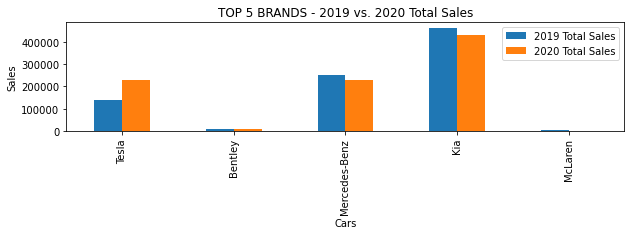

In [109]:
#Bar chart for top 5 brands
top5_df.plot(x="Brand", y=["2019 Total Sales", "2020 Total Sales"], kind='bar', align='center', figsize=(10,2))

#Modify contents of graph
plt.title("TOP 5 BRANDS - 2019 vs. 2020 Total Sales")
plt.xlabel("Cars")
plt.ylabel("Sales")

#Save graph
plt.savefig("Top 5 2019 Total Sales vs. 2020 Total Sales.png")

#Display results
plt.show()

In [112]:
#Created percent change dataframe for top 5 brands
top5_percent_change_df = pd.DataFrame({'Brand': ['Tesla', 'Bentley', 'Mercedes-Benz', 'Kia', 'McLaren'], "Percent Change": [65, 5, -8, -8, -73],})

#Display results
top5_percent_change_df

,Brand,Percent Change
0,Tesla,65
1,Bentley,5
2,Mercedes-Benz,-8
3,Kia,-8
4,McLaren,-73


In [ ]:
#Pie chart for top 5 percent change


In [51]:
#Sort to find bottom 5 selling vehicles based off percent change
car_data_df = car_data_df.sort_values("Percent Change", ascending=True)

#Display results
car_data_df.head(5)


,Brand,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,2019 Total Sales,2020 Total Sales,Percent Change
5,Bugatti,21,21,21,19,19,19,63,57,-10%
33,Porsche,15024,15233,14805,11984,12193,15548,45062,39725,-12%
17,Hyundai,147585,185743,173028,130875,139378,170828,506356,441081,-13%
24,Lexus,66791,68944,73816,56345,50458,75285,209551,182088,-13%
34,Ram,137013,196155,179200,140486,127682,175174,512368,443342,-13%


In [106]:
#Created 2019 & 2020 dataframe for bottom 5 brands to display differences in sales
bottom5_df = pd.DataFrame({'Brand': ['Bugatti', 'Porsche', 'Hyundai', 'Lexus', 'Ram'], "2019 Total Sales": [63, 45062, 506356, 209551, 512368], "2020 Total Sales": [57, 39725, 441081, 182088, 443342]})
#Display results
bottom5_df

,Brand,2019 Total Sales,2020 Total Sales
0,Bugatti,63,57
1,Porsche,45062,39725
2,Hyundai,506356,441081
3,Lexus,209551,182088
4,Ram,512368,443342


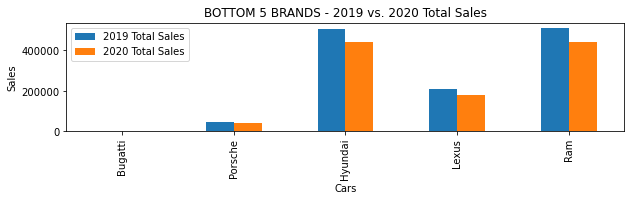

In [111]:
#Bar chart for bottom 5 brands
bottom5_df.plot(x="Brand", y=["2019 Total Sales", "2020 Total Sales"], kind='bar', align='center', figsize=(10,2))

#Modify contents of graph
plt.title("BOTTOM 5 BRANDS - 2019 vs. 2020 Total Sales")
plt.xlabel("Cars")
plt.ylabel("Sales")

#Save graph
plt.savefig("Bottom 5 2019 Total Sales vs. 2020 Total Sales.png")

#Display results
plt.show()

In [113]:
#Created percent change dataframe for bottom 5 brands
bottom5_percent_change_df = pd.DataFrame({'Brand': ['Bugatti', 'Porsche', 'Hyundai', 'Lexus', 'Ram'], "Percent Change": [-10, -12, -13, -13, -13],})

#Display results
bottom5_percent_change_df

,Brand,Percent Change
0,Bugatti,-10
1,Porsche,-12
2,Hyundai,-13
3,Lexus,-13
4,Ram,-13


In [ ]:
#Pie chart for bottom 5 brands